In [34]:
#importing all needed packages
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
# documentation - https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

In [2]:
# please download the dataset from the below link and set the right directory in your local system prior to execution 
# dataset URL- https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

#setting the path for test and train dataset
data_dir = "C:/Users/keert/Downloads/DSP Datasets/GTSRB"

train_path = 'C:/Users/keert/Downloads/DSP Datasets/GTSRB/Train'
test_path = 'C:/Users/keert/Downloads/DSP Datasets/GTSRB/Test'



# Resizing the images to 30 x 30 x 3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
# Checking the total number of unique classes present in our dataset
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# Label Overview 
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

[210, 210, 210, 240, 240, 240, 240, 270, 270, 300, 330, 360, 360, 390, 390, 420, 420, 420, 450, 510, 540, 600, 630, 689, 780, 780, 1110, 1200, 1200, 1320, 1410, 1410, 1440, 1470, 1500, 1860, 1980, 2010, 2070, 2100, 2160, 2220, 2250] ['Dangerous curve left', 'Go straight or left', 'Speed limit (20km/h)', 'End no passing veh > 3.5 tons', 'End of no passing', 'End speed + passing limits', 'Pedestrians', 'Bicycles crossing', 'Road narrows on the right', 'Keep left', 'Double curve', 'Dangerous curve right', 'Roundabout mandatory', 'Bumpy road', 'Go straight or right', 'End of speed limit (80km/h)', 'Turn left ahead', 'Veh > 3.5 tons prohibited', 'Beware of ice/snow', 'Slippery road', 'Children crossing', 'Traffic signals', 'No vehicles', 'Turn right ahead', 'Stop', 'Wild animals crossing', 'No entry', 'Ahead only', 'General caution', 'Right-of-way at intersection', 'Speed limit (120km/h)', 'Speed limit (60km/h)', 'Speed limit (100km/h)', 'No passing', 'Road work', 'Speed limit (80km/h)', 'S

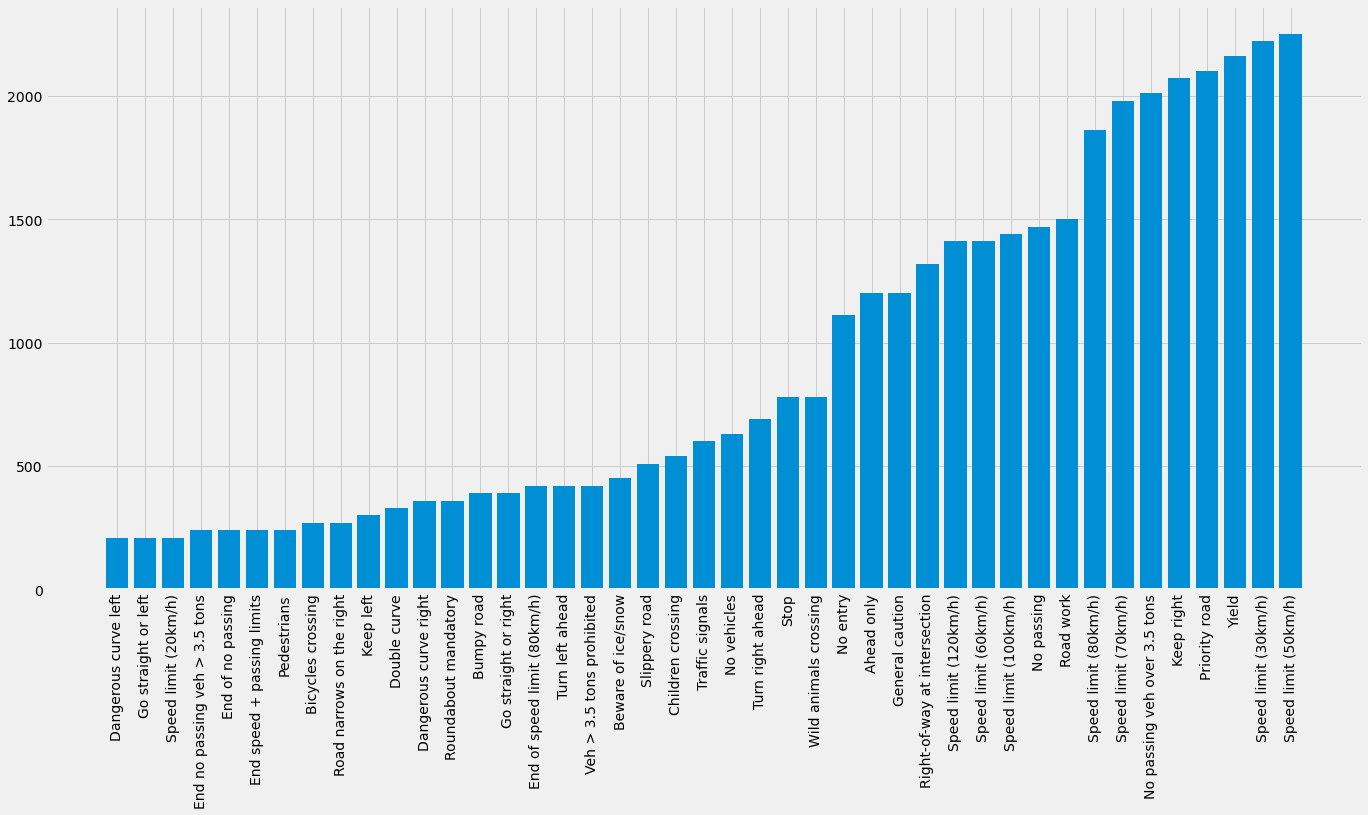

In [5]:
# bar chart between all the unique classes Vs the total number of images present per class

folders = os.listdir(train_path)

train_number = []
class_num = [] # may consider changing to class_name or only keep class number in reality

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]
print(train_number, class_num)
# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

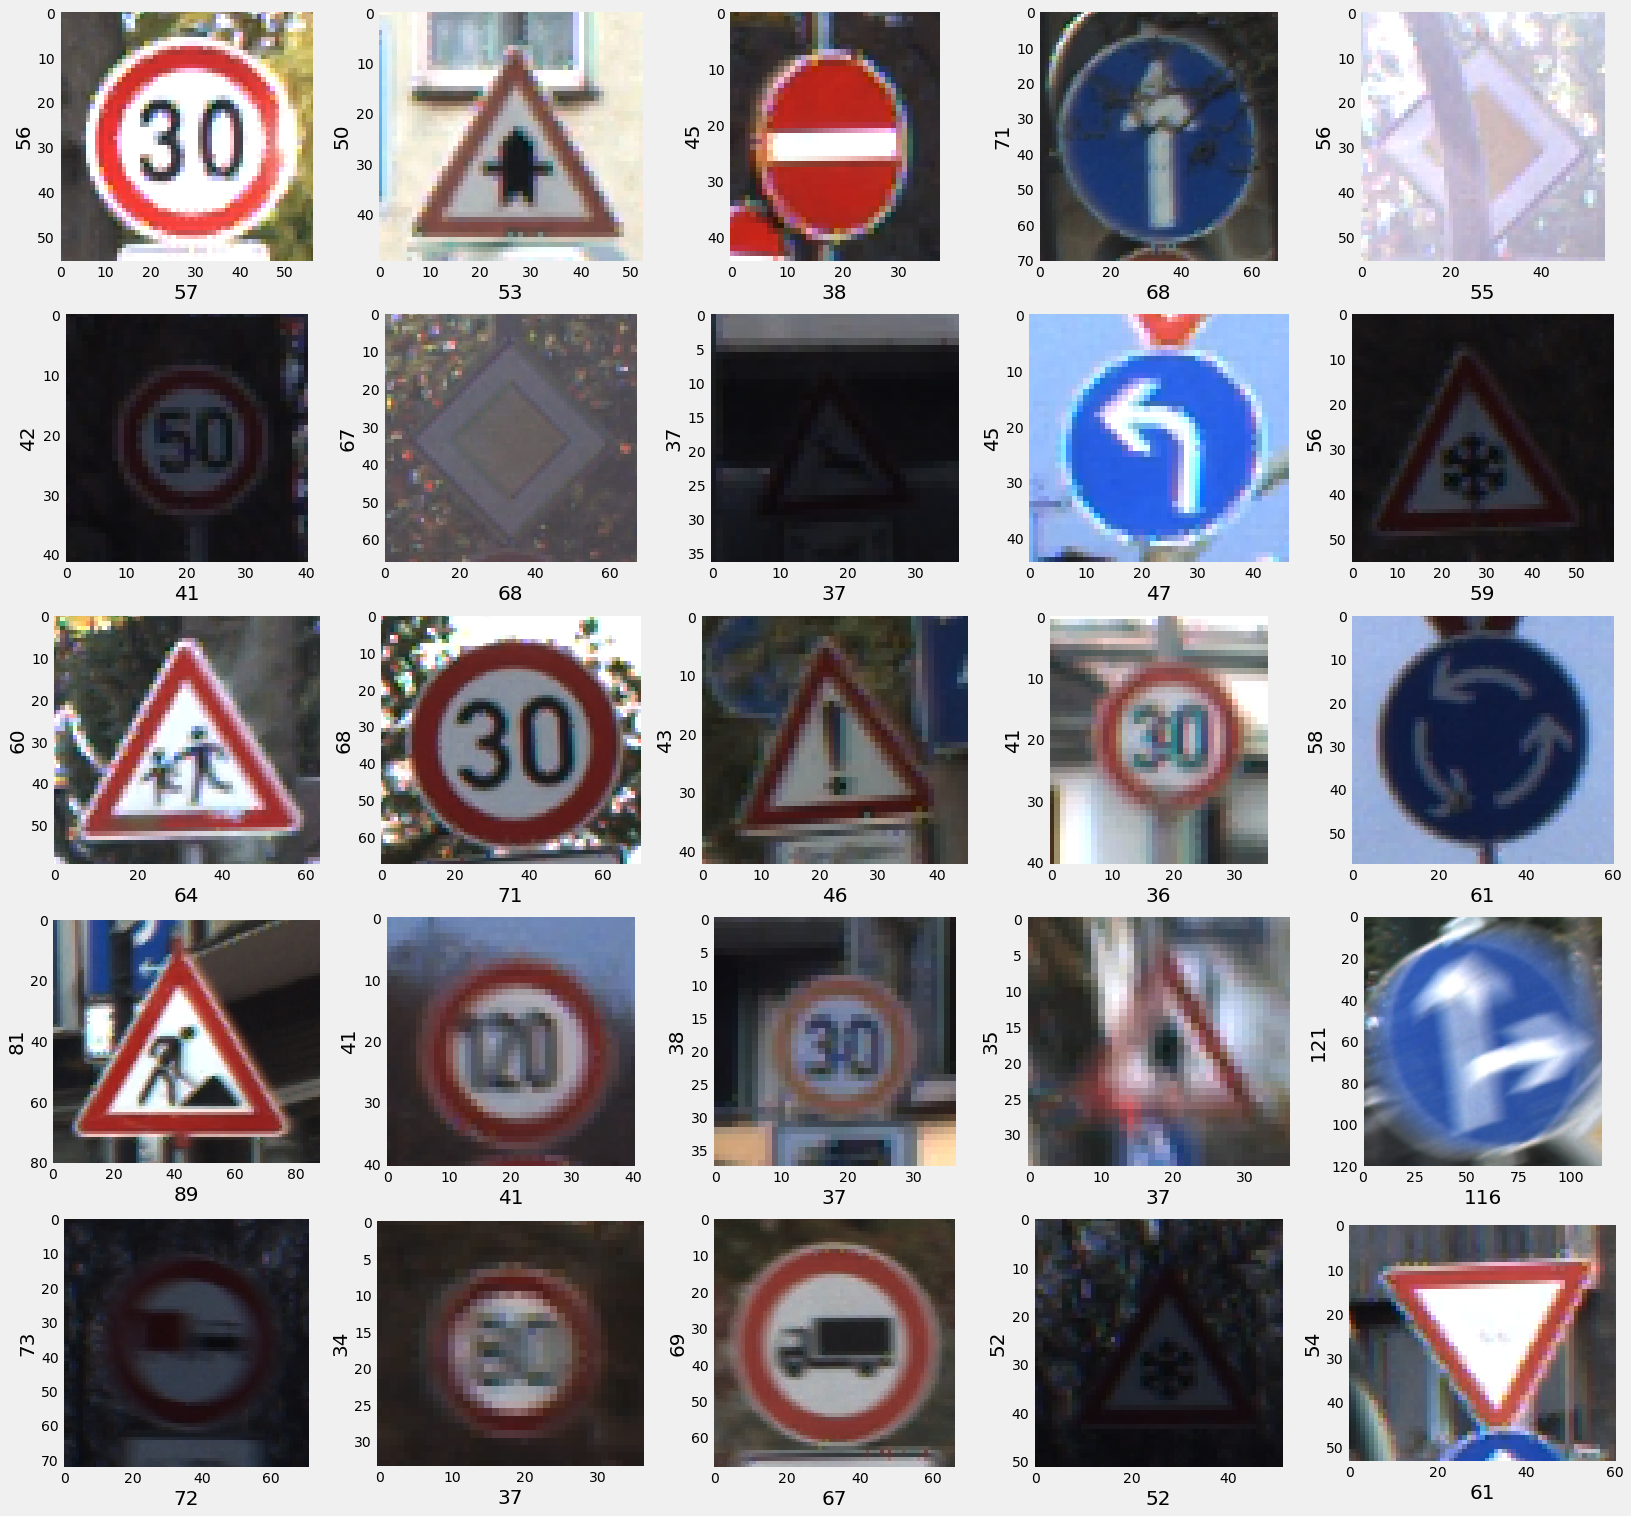

In [6]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20) # height of image

#### PRE-PROCESSING LIMITATIONS AND DATASET CLARITY 

1. As we can observe in the images shown in the output of the cell above, most of the data point scenarios are already available i.e, blurry images, dark images, rotated and translated ones along with some clear ones.

2. Coming to the pre-processing, Resizing is already done in cell 3.

3. We didn't augment data since the dataset already contains images for these scenarios (as we can see in the above cell output) because these images are taken from a video feed at varying speeds, distances and angles.

4. We are not experimenting with Translation and Rotation for the same reason mentioned above.

5. Also, gaussian blurring has been skipped since the dataset already contains extremely bllurry and dark images.

6. Reflection/Flipping, Grayscale has also been skipped since we need the colored images to check the RGB values for predicting 
the type and label of the stop sign.

Histogram Equalization to tweak contrast levels and RGB Color Inversion has also been skipped since the model 
needs to be able to identify in adversarial conditions and must not look for perfect stop sign image capture 
through video all the time.

preprocessing reference
https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/



In [8]:
# resizing all the train images
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            #CV2 reads an image in BGR format. We need to convert it to RGB
            b,g,r = cv2.split(image)         # get b,g,r
            rgb_img = cv2.merge([r,g,b])     # switch it to rgb
            image_fromarray = Image.fromarray(rgb_img, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
# shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [10]:
# splitting the data into 80% train and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [11]:
# one-hot encoding
# Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(31367, 43)
(7842, 43)


## MODEL 1 - CNN with Keras using Conv2D and Max Pooling

In [12]:
#model creation
#Experimenting with Conv2D and Max Pooling to downsample inout layer by layer
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [14]:
# Just an alternate way of specifying same model
model1 = Sequential([    
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),
    
    Dense(43, activation='softmax')
])

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)        

In [16]:
#Using Adam Optimizer - Adam: Adaptive moment estimation as it works with relatively low memory requirements and
#little tuning of hyperparameters.


lr = 0.001
epochs = 10

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
981/981 [==============================] - 28s 29ms/step - loss: 0.3613 - accuracy: 0.9049 - val_loss: 0.0306 - val_accuracy: 0.9923
Epoch 2/10
981/981 [==============================] - 28s 28ms/step - loss: 0.0355 - accuracy: 0.9902 - val_loss: 0.0294 - val_accuracy: 0.9916
Epoch 3/10
981/981 [==============================] - 27s 28ms/step - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.0163 - val_accuracy: 0.9955
Epoch 4/10
981/981 [==============================] - 30s 30ms/step - loss: 0.0118 - accuracy: 0.9972 - val_loss: 0.0202 - val_accuracy: 0.9936
Epoch 5/10
981/981 [==============================] - 28s 29ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0158 - val_accuracy: 0.9952
Epoch 6/10
981/981 [==============================] - 28s 28ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0094 - val_accuracy: 0.9969
Epoch 7/10
981/981 [==============================] - 28s 28ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0128 - val_accuracy:

In [18]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        #CV2 reads an image in BGR format. We need to convert it to RGB
        b,g,r = cv2.split(image)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
        image_fromarray = Image.fromarray(rgb_img, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

In [19]:
y_test = keras.utils.to_categorical(labels, len(np.unique(labels))) #can also use NUM_CATEGORIES

In [20]:
# printing test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.10318340361118317
Test accuracy: 97.51385450363159


#### CNN model 1 accuracy: 97.51%

In [21]:
pred = model.predict(X_test).argmax(axis=1)

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(labels, pred)

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 713,   3, ...,   0,   1,   0],
       [  0,   1, 748, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  80,   0,   0],
       [  0,   0,   0, ...,   0,  54,   0],
       [  0,   0,   0, ...,   0,   0,  88]], dtype=int64)

In [24]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.99      0.97       720
           2       0.97      1.00      0.98       750
           3       0.98      0.97      0.97       450
           4       1.00      0.98      0.99       660
           5       0.93      0.99      0.96       630
           6       1.00      0.84      0.91       150
           7       0.99      0.97      0.98       450
           8       0.98      0.97      0.97       450
           9       0.99      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.95      0.99      0.97       420
          12       0.99      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       0.99      1.00      1.00       150
          17       0.99    

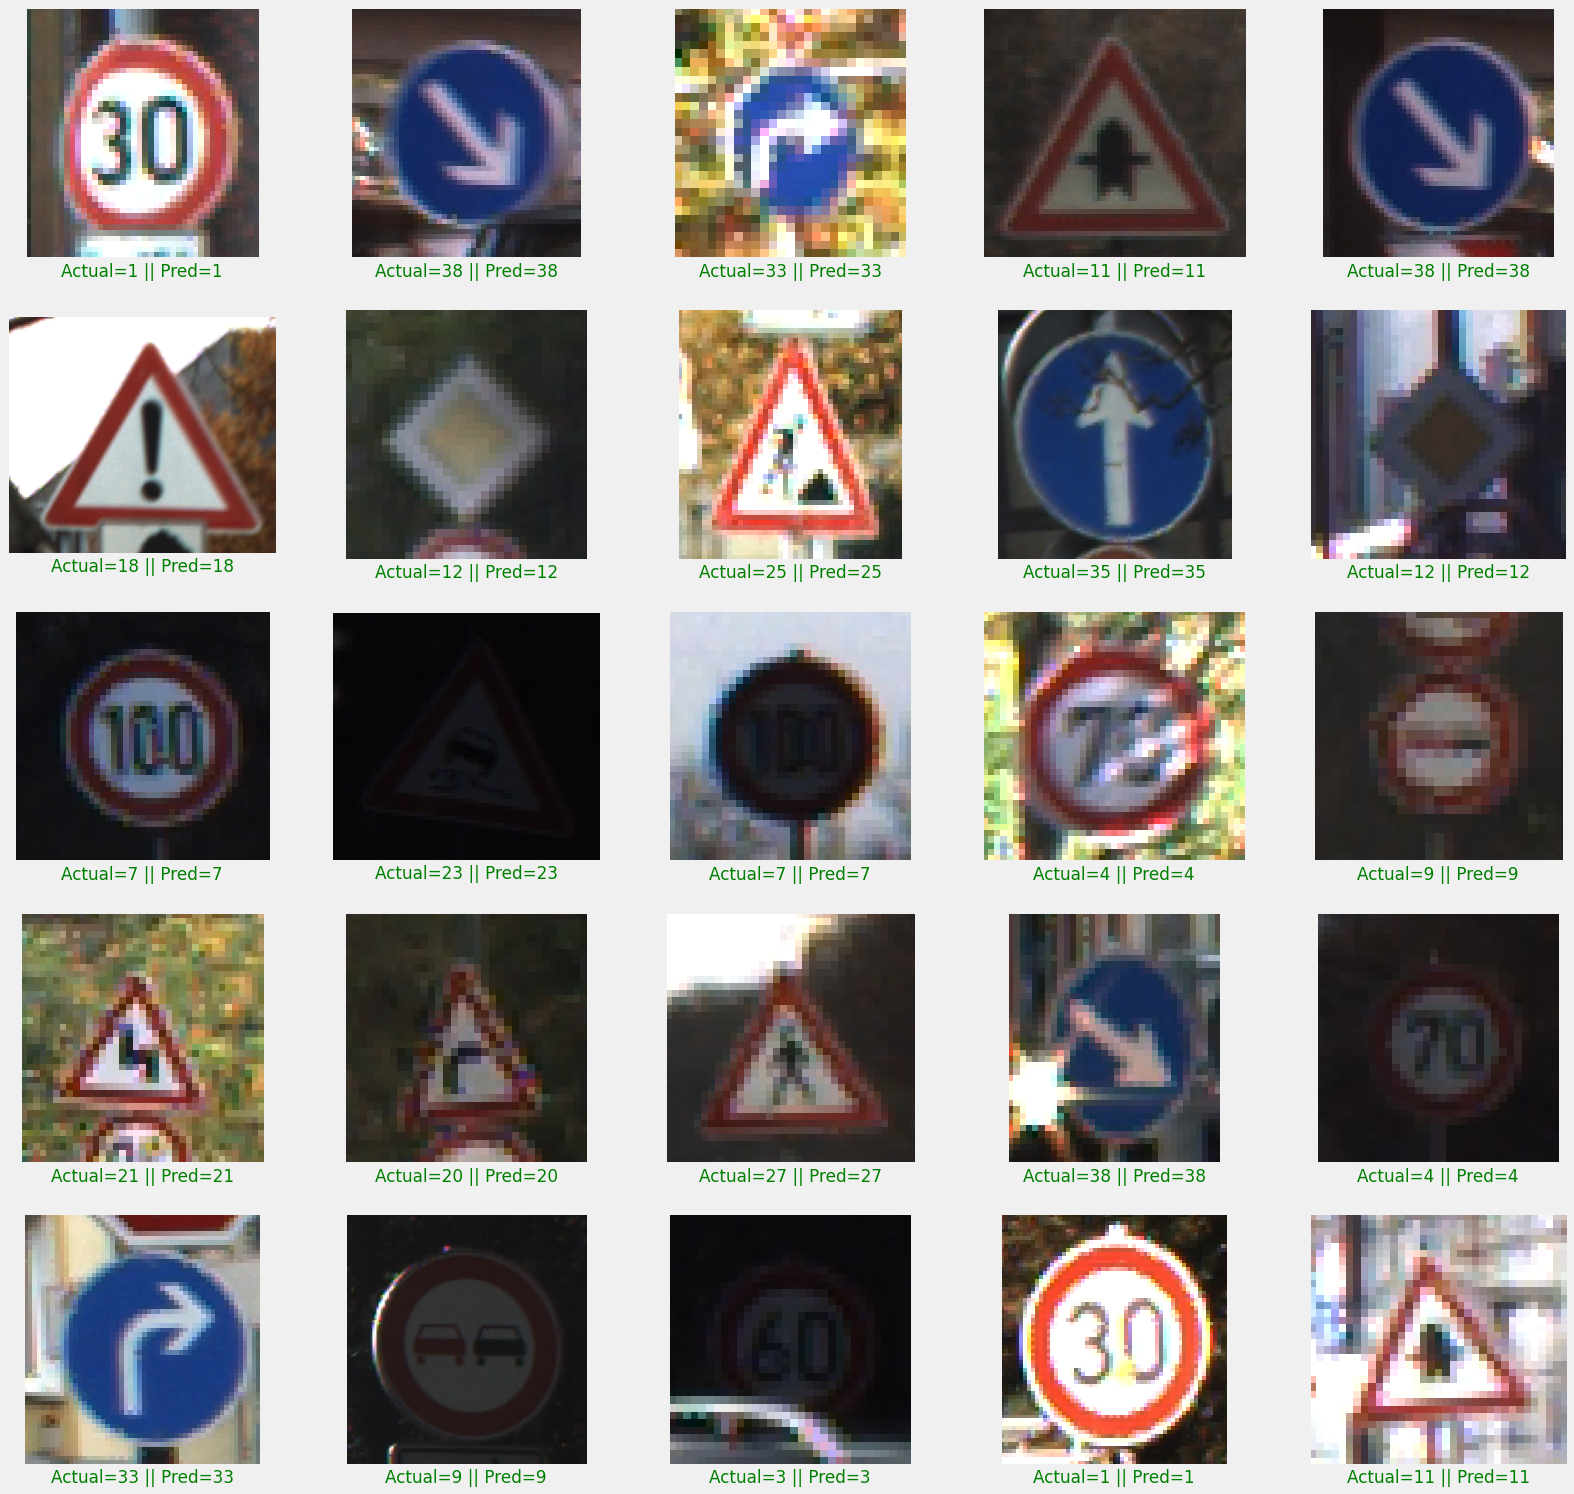

In [29]:
#printing some images with both the predicted and the actual labels.

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(1, 26):
    plt.subplot(5, 5, i)
    img_path = data_dir + '/' + imgs[i]
    img = imread(img_path)
    plt.imshow(img)
    plt.grid(b=None)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)

In [122]:
# The model is able to predict the labels correctly

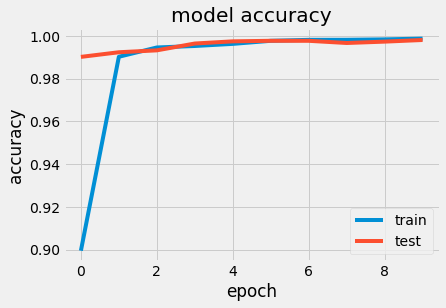

In [30]:
# plotting the model accuracy curve 
plt.plot(history.history['accuracy']) #CHANGE history5 to whatever name you give while training DL model
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

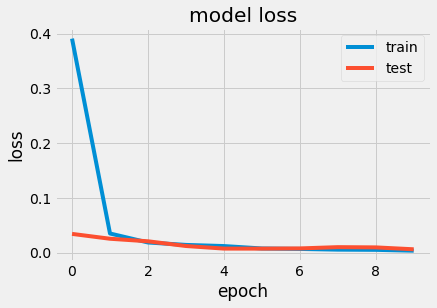

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
# Plot ROC curves (slightly complicated as we are doing not binary but multi-label classification)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

## MODEL 2 

### Tweaking Model 1 - Changed dropout to 0.25 at three different points and added padding to ensure the edges of the images don't get ingnored while detecting the road signs

In [31]:
# TRIAL FOR OTHER CLASSIFIERS
#added padding and changed dropout to 0.25 at three different points
model2 = Sequential()
model2.add(Conv2D(16,(3,3),padding='valid',input_shape = X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model2.add(Dropout(0.25))
model2.add(Conv2D(32,(3,3),padding='valid'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model2.add(Dropout(0.25))
model2.add(Conv2D(64,(3,3),padding='valid'))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(43))
model2.add(Activation('softmax'))

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)         

In [36]:
model_feat = tf.keras.Model(inputs=model2.input,outputs=model2.output)

In [37]:
feat_train = model_feat.predict(X_train)

In [38]:
feat_test = model_feat.predict(X_test)

In [39]:
lr = 0.001
epochs = 10

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [40]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/10
981/981 [==============================] - 12s 12ms/step - loss: 1.4770 - accuracy: 0.5741 - val_loss: 0.3718 - val_accuracy: 0.9069
Epoch 2/10
981/981 [==============================] - 12s 12ms/step - loss: 0.4425 - accuracy: 0.8656 - val_loss: 0.1789 - val_accuracy: 0.9611
Epoch 3/10
981/981 [==============================] - 12s 13ms/step - loss: 0.2887 - accuracy: 0.9105 - val_loss: 0.1281 - val_accuracy: 0.9677
Epoch 4/10
981/981 [==============================] - 12s 12ms/step - loss: 0.2270 - accuracy: 0.9308 - val_loss: 0.0899 - val_accuracy: 0.9781
Epoch 5/10
981/981 [==============================] - 12s 12ms/step - loss: 0.1879 - accuracy: 0.9430 - val_loss: 0.0748 - val_accuracy: 0.9842
Epoch 6/10
981/981 [==============================] - 12s 12ms/step - loss: 0.1603 - accuracy: 0.9504 - val_loss: 0.0602 - val_accuracy: 0.9862
Epoch 7/10
981/981 [==============================] - 12s 12ms/step - loss: 0.1394 - accuracy: 0.9573 - val_loss: 0.0520 - val_accuracy:

In [41]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        #CV2 reads an image in BGR format. We need to convert it to RGB
        b,g,r = cv2.split(image)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
        image_fromarray = Image.fromarray(rgb_img, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

In [42]:
y_test = keras.utils.to_categorical(labels, len(np.unique(labels))) #can also use NUM_CATEGORIES

In [43]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


Test loss: 0.21332396566867828
Test accuracy: 94.18843984603882


#### CNN model 2 accuracy: 94.18%

Accuracy has gone down indicating that padding didn't help the model to learn the data in the road signs, rather, it ended up learning the noise more. This is counter-intuitive to what we assumed.

In [32]:
pred2 = model2.predict(X_test).argmax(axis=1)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels, pred2)
# CAN PRINT TO SEE ACCURACY FOR EACH OF THE 43 CLASSES

array([[ 57,   0,   0, ...,   0,   0,   0],
       [  0, 701,   8, ...,   0,   0,   0],
       [  0,  12, 737, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ...,  80,   0,   0],
       [  0,   0,   0, ...,   0,  46,   0],
       [  0,   0,   0, ...,   0,   1,  88]], dtype=int64)

## MODEL 3: SGD

In [91]:
#SGD, SINGLE AND MULTI PERCEPTRON

In [38]:
data_dir = "C:/Users/keert/Downloads/DSP Datasets/GTSRB"
train_path = 'C:/Users/keert/Downloads/DSP Datasets/GTSRB/Train'
test_path = 'C:/Users/keert/Downloads/DSP Datasets/GTSRB/Test'



# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [39]:
# Returns list containing names of entries in directory given by path: os.listdir(path)
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [40]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            #CV2 reads an image in BGR format. We need to convert it to RGB
            b,g,r = cv2.split(image)       # get b,g,r
            rgb_img = cv2.merge([r,g,b])     # switch it to rgb
            image_fromarray = Image.fromarray(rgb_img, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [41]:
# shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [43]:
#splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [44]:

X_train = X_train.reshape(27446,2700)
X_val = X_val.reshape(11763,2700)
print('X_train: ',X_train.shape, '\ty_train: ', y_train.shape, '\tX_test: ',X_val.shape, '\ty_test: ',y_val.shape)

X_train:  (27446, 2700) 	y_train:  (27446,) 	X_test:  (11763, 2700) 	y_test:  (11763,)


In [104]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(alpha=0.1,max_iter= 1000, tol=1e-03,validation_fraction=0.4, random_state=21)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_val)

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_val, y_pred)

array([[  2,  55,   0, ...,   0,   0,   0],
       [  0, 547,  15, ...,   0,   0,   0],
       [  0,  93, 357, ...,   0,   0,   0],
       ...,
       [  0,  14,   0, ...,  48,   1,   0],
       [  0,   4,   0, ...,   0,  28,   0],
       [  0,   2,   0, ...,   0,   8,   5]], dtype=int64)

In [107]:
sgd_clf.score(X_val,y_val)

0.7036470288191787

In [108]:
acc = accuracy_score(y_val, y_pred)
print(acc)

0.7036470288191787


#### SGD accuracy: 70%

In [109]:
cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.03      0.06        63
           1       0.49      0.84      0.62       653
           2       0.80      0.52      0.63       685
           3       0.47      0.57      0.51       421
           4       0.72      0.76      0.74       581
           5       0.30      0.61      0.40       556
           6       0.87      0.11      0.19       121
           7       0.82      0.72      0.76       447
           8       0.63      0.73      0.68       424
           9       0.92      0.79      0.85       470
          10       0.80      0.92      0.86       623
          11       0.82      0.62      0.70       388
          12       0.84      0.96      0.89       651
          13       0.76      0.98      0.86       673
          14       0.93      0.88      0.90       231
          15       0.88      0.23      0.36       187
          16       0.97      0.75      0.84       127
          17       0.92    

D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 4: Single Perceptron

In [111]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=21)
per_clf.fit(X_train, y_train)

y_pred = per_clf.predict(X_val)

In [112]:
accuracy_score(y_val,y_pred)

0.9045311570177675

#### Single Perceptron accuracy: 90%

In [113]:
confusion_matrix(y_val, y_pred)

array([[ 48,  11,   0, ...,   0,   0,   0],
       [  0, 595,  11, ...,   2,   0,   0],
       [  2,  28, 563, ...,   8,   0,   2],
       ...,
       [  0,   2,   0, ..., 107,   0,   0],
       [  0,   0,   0, ...,   0,  67,   1],
       [  0,   0,   0, ...,   1,   0,  67]], dtype=int64)

In [114]:
cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        63
           1       0.83      0.91      0.87       653
           2       0.94      0.82      0.88       685
           3       0.98      0.64      0.77       421
           4       0.81      0.94      0.87       581
           5       0.88      0.69      0.78       556
           6       0.93      0.95      0.94       121
           7       0.70      0.95      0.81       447
           8       0.71      0.91      0.80       424
           9       0.94      0.95      0.94       470
          10       0.96      0.97      0.97       623
          11       0.99      0.87      0.93       388
          12       0.98      1.00      0.99       651
          13       0.96      0.98      0.97       673
          14       1.00      0.93      0.96       231
          15       0.96      0.87      0.91       187
          16       1.00      0.98      0.99       127
          17       0.97    

## Multi-Perceptron Classifier

In [116]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 600 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=(300,))
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_val)

In [117]:
accuracy_score(y_val, y_pred)

0.9729660800816118

#### Multi Perceptron accuracy 97.2%

In [118]:
confusion_matrix(y_val, y_pred)

array([[ 56,   6,   0, ...,   0,   0,   0],
       [  0, 621,  12, ...,   0,   0,   0],
       [  0,   4, 662, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 112,   0,   0],
       [  0,   0,   0, ...,   0,  71,   1],
       [  0,   0,   0, ...,   0,   0,  71]], dtype=int64)

In [119]:
X_train.shape, X_val.shape

((27446, 2700), (11763, 2700))

In [120]:
cr = classification_report(y_val,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        63
           1       0.97      0.95      0.96       653
           2       0.96      0.97      0.96       685
           3       0.94      0.92      0.93       421
           4       0.96      0.99      0.98       581
           5       0.91      0.97      0.94       556
           6       0.99      0.98      0.99       121
           7       0.98      0.96      0.97       447
           8       0.96      0.96      0.96       424
           9       0.97      0.97      0.97       470
          10       0.98      0.99      0.98       623
          11       0.97      0.96      0.96       388
          12       1.00      0.99      1.00       651
          13       0.99      0.99      0.99       673
          14       0.99      0.99      0.99       231
          15       0.98      0.95      0.97       187
          16       1.00      0.99      1.00       127
          17       0.99    